In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [37]:
states = gpd.read_file('data/50-22_init_point/usa-states-census-2014.shp')
tornado = gpd.read_file('data/50-22_init_point/1950-2022-torn-initpoint.shp')
torn_paths = gpd.read_file('data/50-22_init_point/1950-2018-torn-aspath.shp')

In [38]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


In [39]:
tornado = tornado.drop(columns=['date'])

In [40]:
tornado.head()

,om,yr,mo,dy,time,tz,st,stf,stn,mag,...,loss,closs,slat,slon,elat,elon,len,wid,fc,geometry
0,192,1950,10,1,21:00:00,3,OK,40,23,1,...,4.0,0.0,36.73,-102.52,36.8800,-102.3000,15.8,10,0,POINT (-102.52000 36.73000)
1,193,1950,10,9,02:15:00,3,NC,37,9,3,...,5.0,0.0,34.17,-78.60,34.1701,-78.5999,2.0,880,0,POINT (-78.60000 34.17000)
2,195,1950,11,20,02:20:00,3,KY,21,1,2,...,5.0,0.0,37.37,-87.20,37.3701,-87.1999,0.1,10,0,POINT (-87.20000 37.37000)
3,196,1950,11,20,04:00:00,3,KY,21,2,1,...,5.0,0.0,38.20,-84.50,38.2001,-84.4999,0.1,10,0,POINT (-84.50000 38.20000)
4,197,1950,11,20,07:30:00,3,MS,28,14,1,...,4.0,0.0,32.42,-89.13,32.4201,-89.1299,2.0,37,0,POINT (-89.13000 32.42000)


In [41]:
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [42]:
states = states.to_crs('EPSG:3395')

In [43]:
tornado.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [44]:
tornado = tornado.to_crs('EPSG:3395')

In [45]:
states.shape

(58, 11)

In [46]:
tornado.shape

(68701, 22)

In [47]:
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   58 non-null     object  
 1   STATENS   58 non-null     object  
 2   AFFGEOID  58 non-null     object  
 3   GEOID     58 non-null     object  
 4   STUSPS    58 non-null     object  
 5   NAME      58 non-null     object  
 6   LSAD      58 non-null     object  
 7   ALAND     58 non-null     int64   
 8   AWATER    58 non-null     int64   
 9   region    58 non-null     object  
 10  geometry  58 non-null     geometry
dtypes: geometry(1), int64(2), object(8)
memory usage: 5.1+ KB


In [48]:
states[:1].geometry

0    MULTIPOLYGON Z (((-13201820.240 3933920.113 0....
Name: geometry, dtype: geometry

<Axes: >

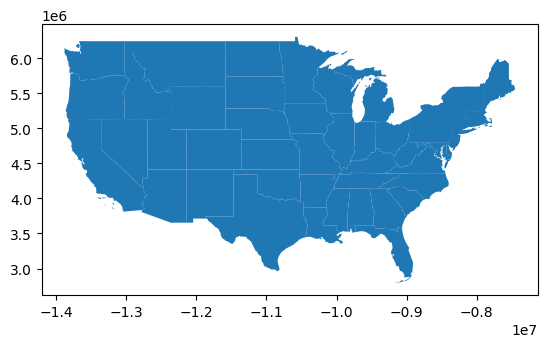

In [49]:
states.plot()

In [50]:
tornado.geometry[:1]

0    POINT (-11412474.196 4375983.260)
Name: geometry, dtype: geometry

<Axes: >

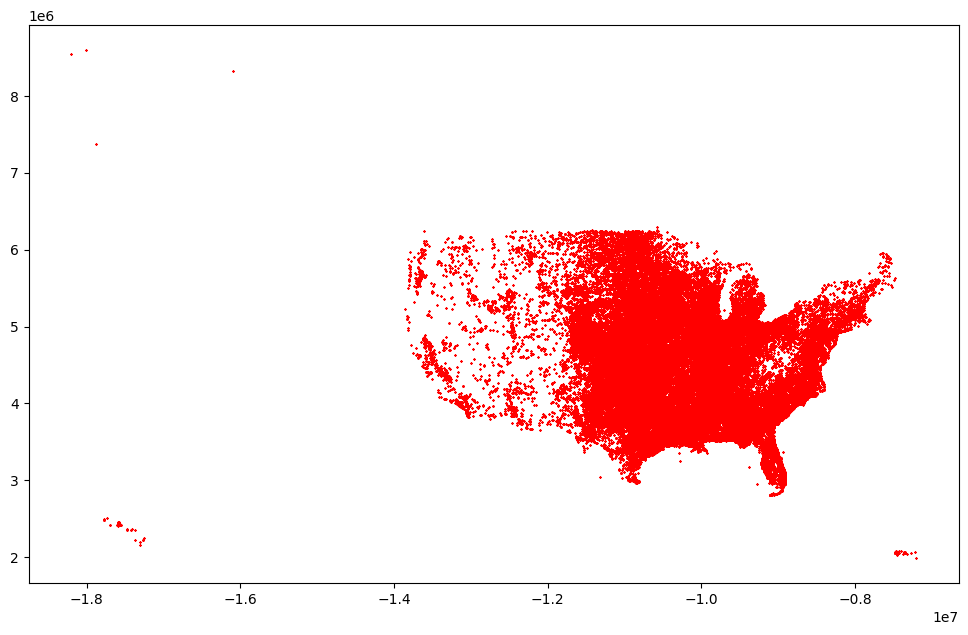

In [51]:
tornado.plot( figsize=(12,9), color='red', marker='x', markersize=1)

<Axes: >

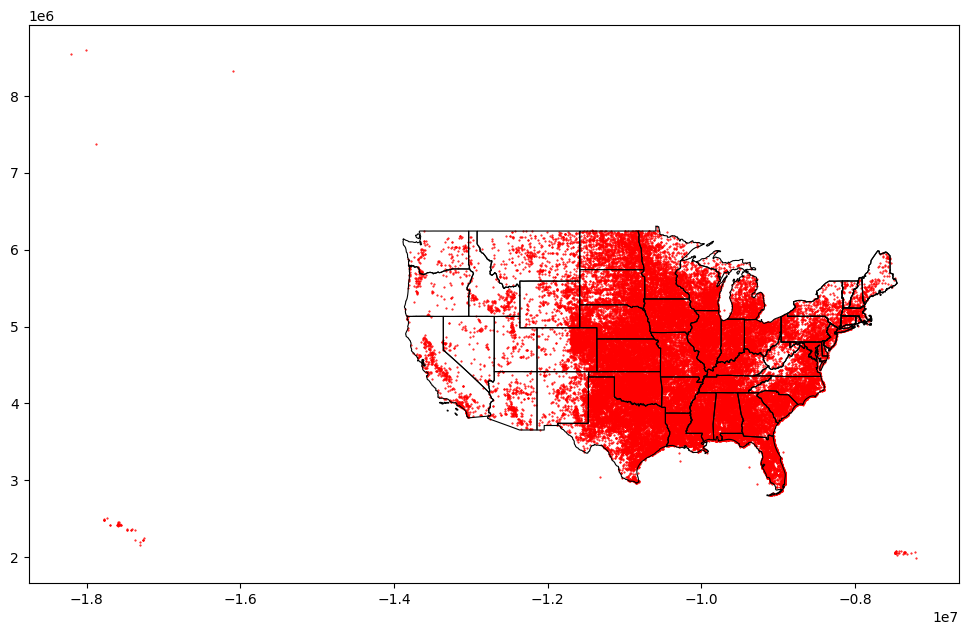

In [52]:
fig = plt.figure(1, figsize=(12,9)) 
ax = fig.add_subplot()
states.boundary.plot(ax=ax, color='black', linewidth=.8)

tornado.plot(ax=ax, color='red', marker='.', markersize=1)

In [53]:
# fig = plt.figure(1, figsize=(12,9)) 
# ax = fig.add_subplot()

# ax.set_xlim(-14100244, -7200000)
# ax.set_ylim(2600000, 6550000)

# fig.suptitle('United States Tornado Map (1950-2018)', fontsize=16)

# states.boundary.plot(ax=ax, color='black', linewidth=.8)

# tornado.plot(ax=ax, color='red', marker='v', markersize=8)

In [54]:
torn_paths = torn_paths.to_crs("EPSG:3395")

In [55]:
torn_sts = tornado.copy()

In [56]:
torn_sts['tornados'] = 1

In [57]:
torn_sts = torn_sts[['tornados', 'st']].groupby('st').count()
torn_sts.sort_values('tornados', ascending=False)

,tornados
st,
TX,9267
KS,4429
OK,4146
FL,3566
NE,2993
IA,2815
IL,2717
MS,2594
AL,2456


<Axes: >

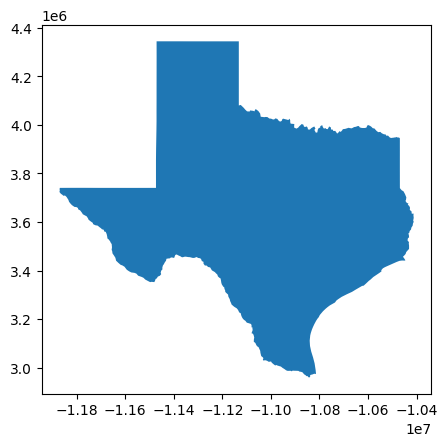

In [58]:
texas_map = states[states['NAME'] == 'Texas']
texas_map.plot()

In [65]:
def map_and_tornado():
    name = input('Please enter a state name: ')
    abbr = input('Please enter a state abbreviation: ')
    state_map = states[states['NAME'] == name]
    torn_start = tornado[tornado['st'] == abbr]
    tornado_path = torn_paths[torn_paths['st'] == abbr]
    
    fig = plt.figure(1, figsize=(10,10)) 
    ax = fig.add_subplot()

# Adjust bounding box to only Texas
# -119.00000, 29.30000, -103.80000, 44.00000

    ax.set_xlim(-11910000, -10380000)
    ax.set_ylim(2930000, 4400000)

    fig.suptitle(f'{name} Tornadoes (1950-2018)', fontsize=16)

    state_map.boundary.plot(ax=ax, color='black', linewidth=.8)

    # plotting tornado paths
#     torn_start.plot(ax=ax, color='pink', marker='v', markersize=20)
#     tornado_path.plot(ax=ax, color='red')
    
    # plotting tornado paths by year
    torn_start.plot(ax=ax, column='yr', cmap="coolwarm", marker='v', markersize=20)
    tornado_path.plot(ax=ax, column='yr', cmap="coolwarm")

Please enter a state name: Texas
Please enter a state abbreviation: TX


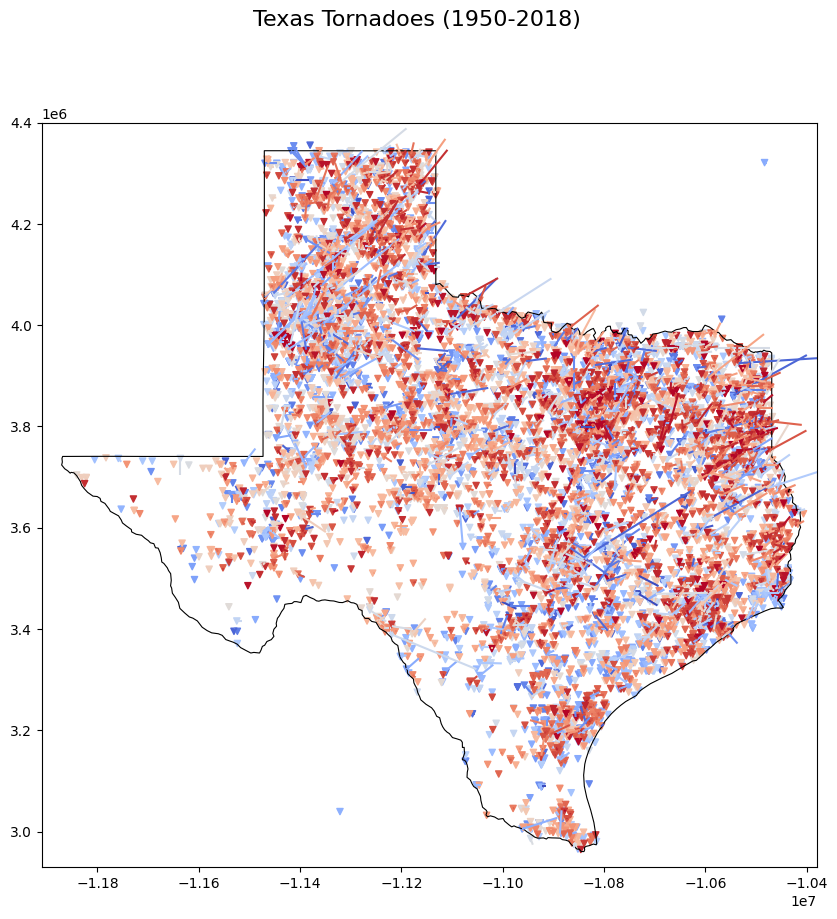

In [66]:
map_and_tornado()

In [62]:
torn_paths

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,loss,closs,slat,slon,elat,elon,len,wid,fc,geometry
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,6.0,0.0,38.7700,-90.2200,38.8300,-90.0300,9.50,150,0,"LINESTRING (-10043244.459 4662018.860, -100220..."
1,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,5.0,0.0,39.1000,-89.3000,39.1200,-89.2300,3.60,130,0,"LINESTRING (-9940830.528 4709053.526, -9933038..."
2,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,4.0,0.0,40.8800,-84.5800,40.8801,-84.5799,0.10,10,0,"LINESTRING (-9415402.531 4966686.373, -9415391..."
3,4,1950,1,13,1950-01-13,05:25:00,3,AR,5,1,...,3.0,0.0,34.4000,-94.3700,34.4001,-94.3699,0.60,17,0,"LINESTRING (-10505220.346 4058499.570, -105052..."
4,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,2,...,5.0,0.0,37.6000,-90.6800,37.6300,-90.6500,2.30,300,0,"LINESTRING (-10094451.425 4496998.866, -100911..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63640,617020,2018,12,27,2018-12-27,10:15:00,3,LA,22,0,...,7000.0,0.0,30.1302,-92.3645,30.1321,-92.3547,0.60,25,0,"LINESTRING (-10281969.107 3498851.970, -102808..."
63641,617021,2018,12,27,2018-12-27,10:29:00,3,MS,28,0,...,15000.0,0.0,32.6431,-90.4509,32.6427,-90.4288,1.29,100,0,"LINESTRING (-10068948.130 3824980.430, -100664..."
63642,617022,2018,12,31,2018-12-31,12:35:00,3,KY,21,0,...,55000.0,0.0,36.8900,-87.9870,36.8915,-87.9734,0.76,125,0,"LINESTRING (-9794668.036 4398134.051, -9793154..."
63643,617023,2018,12,31,2018-12-31,13:43:00,3,IN,18,0,...,50000.0,0.0,38.1813,-86.8863,38.2006,-86.8585,2.01,50,0,"LINESTRING (-9672138.673 4578652.990, -9669043..."
